<a href="https://colab.research.google.com/github/andreuartigues/Deep-Learning/blob/main/Regularization%26Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from mlxtend.plotting import plot_decision_regions

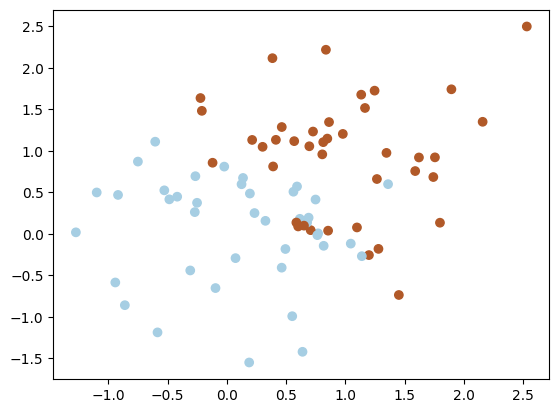

In [7]:
centers = ([0, 0], [1, 1])
X_train, y_train = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
X_test, y_test = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
# Plotting
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.show()

In [8]:
my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2,), name="input"),
    layers.Dense(units=10, activation="relu", kernel_regularizer=regularizers.l2(0.01)), #l2 and dropout for each layer!!!!!1
    layers.Dropout(0.2),
    layers.Dense(units=10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [9]:
my_first_neural_net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
my_first_neural_net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
                                  loss= tf.keras.losses.binary_crossentropy,
                                  metrics=['accuracy'])

In [11]:
history = my_first_neural_net.fit(X_train, y_train, epochs=5000, verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
3/3 - 0s - loss: 0.3201 - accuracy: 0.8750 - 12ms/epoch - 4ms/step
Epoch 2502/5000
3/3 - 0s - loss: 0.3044 - accuracy: 0.8625 - 11ms/epoch - 4ms/step
Epoch 2503/5000
3/3 - 0s - loss: 0.3406 - accuracy: 0.8625 - 11ms/epoch - 4ms/step
Epoch 2504/5000
3/3 - 0s - loss: 0.3163 - accuracy: 0.9000 - 14ms/epoch - 5ms/step
Epoch 2505/5000
3/3 - 0s - loss: 0.3428 - accuracy: 0.8375 - 11ms/epoch - 4ms/step
Epoch 2506/5000
3/3 - 0s - loss: 0.3402 - accuracy: 0.8375 - 12ms/epoch - 4ms/step
Epoch 2507/5000
3/3 - 0s - loss: 0.3578 - accuracy: 0.8375 - 12ms/epoch - 4ms/step
Epoch 2508/5000
3/3 - 0s - loss: 0.3585 - accuracy: 0.8500 - 12ms/epoch - 4ms/step
Epoch 2509/5000
3/3 - 0s - loss: 0.3046 - accuracy: 0.8625 - 12ms/epoch - 4ms/step
Epoch 2510/5000
3/3 - 0s - loss: 0.2980 - accuracy: 0.8875 - 11ms/epoch - 4ms/step
Epoch 2511/5000
3/3 - 0s - loss: 0.3281 - accuracy: 0.8375 - 12ms/epoch - 4ms/step
Epoch 2512/5000
3/3 - 0s - loss: 0.3

9600/9600 [==============================] - 14s 1ms/step


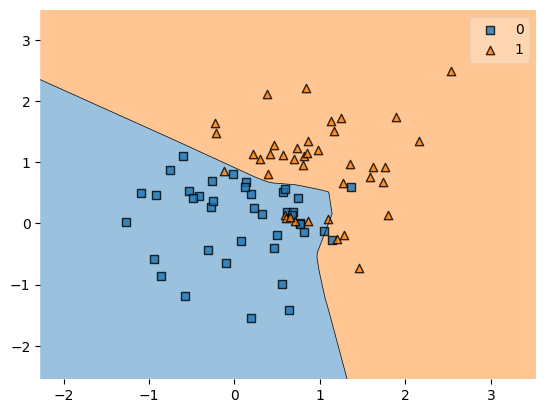

In [12]:
plot_decision_regions(X_train, y_train, clf=my_first_neural_net)
plt.show()

In [13]:
my_first_neural_net.evaluate(X_train, y_train)

3/3 [==============================] - 0s 5ms/step - loss: 0.2763 - accuracy: 0.8875


[0.2763327658176422, 0.887499988079071]

In [14]:
my_first_neural_net.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.6258 - accuracy: 0.7875


[0.6257873177528381, 0.7875000238418579]

### Before regularization, the respective accuracies for training and testing was, 83.75% and 73.75%. After that, with L2 and Dropout it is 88.75% and 78.75%, respectively again. While accuracy increased, the gap is still the same.